##Этап 1. Предобработка.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.columns = [i.lower() for i in data.columns]

In [ ]:
try:
  data['user_score'] = data['user_score'].astype(float)
except ValueError:
  print('ValueError: Some values are not float')

ValueError: Some values are not float


In [ ]:
data.loc[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd означает очень плохую оценку

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

заменим на низшую оценку (0)

In [ ]:
data.loc[data['user_score']=='tbd', 'user_score'] = 0

In [ ]:
data['user_score'] = data['user_score'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


просто удалим

In [ ]:
data = data[data['name'].isna()==False].reset_index(drop=True)

In [ ]:
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,0.0,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


просто удалим, тк заменить чем-то слишком сложно

In [ ]:
data = data[data['year_of_release'].isna()==False].reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
data.loc[data['critic_score'].isna(), 'critic_score'] = np.mean(data['critic_score'])
data.loc[data['user_score'].isna(), 'user_score'] = np.mean(data['user_score'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

заменим все nan на моду столбца (E)

In [ ]:
data.loc[data['rating'].isna(), 'rating'] = data['rating'].value_counts().index[0]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
data['world_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.994363,5.405407,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.994363,5.405407,E,31.38


##Этап 2. Анализ.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  world_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.994363,5.405407,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.994363,5.405407,E,31.38


посмотрим сколько игр выпускалось за все годы

In [ ]:
data_group_by_year = data.groupby(by=['year_of_release']).count()['name']
data_group_by_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

полагаю, до 1994 года данные незначительны

посмотрим как менялись продажи по платформам

In [ ]:
data_group_by_platform = data.groupby(by=['platform']).sum().sort_values(by=['world_sales'], ascending=False)
data_group_by_platform

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
platform,,,,,,,,
PS2,4263750.0,572.92,332.63,137.54,190.47,146394.197294,12929.928133,1233.56
X360,2476173.0,595.74,268.32,12.30,84.88,84725.094701,7416.003039,961.24
PS3,2626158.0,390.13,327.21,79.41,134.59,91292.170237,7720.635725,931.34
Wii,2583531.0,486.87,258.32,68.28,77.71,85195.952649,5368.076187,891.18
DS,4259361.0,380.31,188.41,175.02,59.04,142609.034949,8271.277101,802.78
PS,2377627.0,334.72,212.39,139.78,40.69,82611.396843,6584.636762,727.58
PS4,789937.0,108.74,141.09,15.96,48.35,27826.210823,2431.597510,314.14
GBA,1624604.0,184.12,74.59,46.56,7.61,55230.852311,3557.432930,312.88
PSP,2396417.0,107.27,65.62,75.88,40.76,81644.845547,6576.352434,289.53


In [ ]:
count_of_the_top_platforms = 5 # число топ платформ, которые мы будем учитывать
top_platforms = data_group_by_platform.index[0:count_of_the_top_platforms]

In [ ]:
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

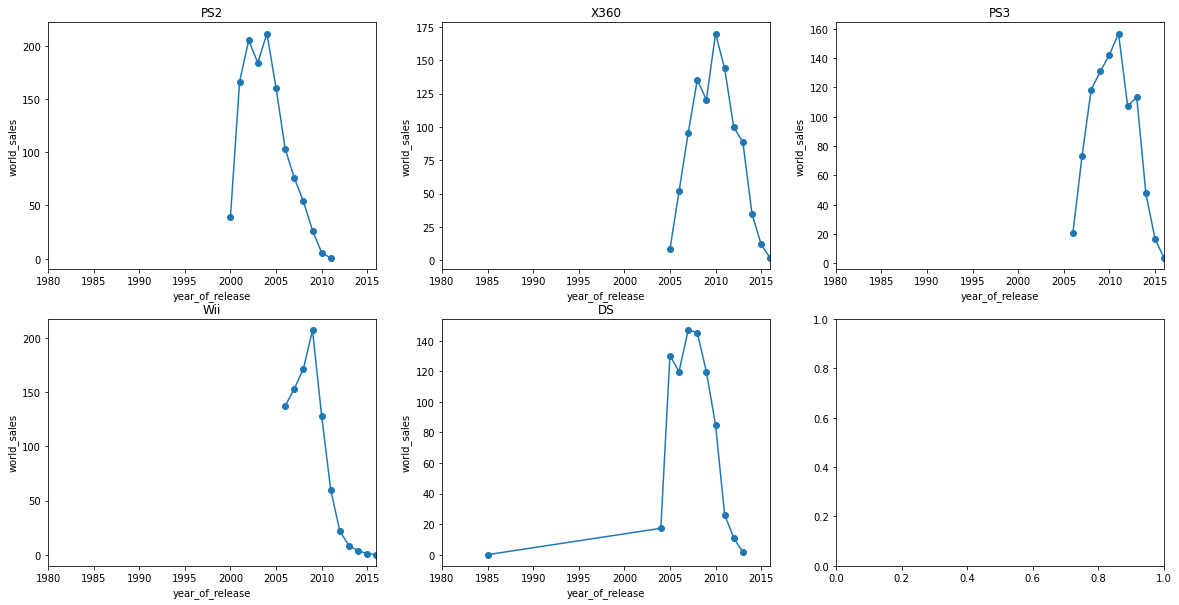

In [ ]:
def visualize_by_platforms(platforms, data, param_x, param_y):
  top_world_sales = [data.loc[data['platform']==platform].groupby(by=param_x).sum()[param_y] for platform in platforms]

  fig, ax = plt.subplots((len(platforms)+2)//3, 3, figsize=(20,5*((len(platforms)+2)//3)))
  ax = ax.ravel()
  for i in range(len(ax)):
    try:
      ax[i].set_title(platforms[i])
      ax[i].plot(top_world_sales[i])
      ax[i].scatter(top_world_sales[i].index, top_world_sales[i].values)
    except:
      break
    ax[i].set_xlabel(param_x)
    ax[i].set_ylabel(param_y)
    ax[i].set_xlim(1980, 2016)
  plt.show()
visualize_by_platforms(top_platforms, data, 'year_of_release', 'world_sales')

в период 2005-2010 был наибольший скачок роста продаж, однако к 2016 году у всех из производителей сильно упали продажи

посмотрим на более современные устройства по моему личному мнению: PS4, XOne, PC, PSV

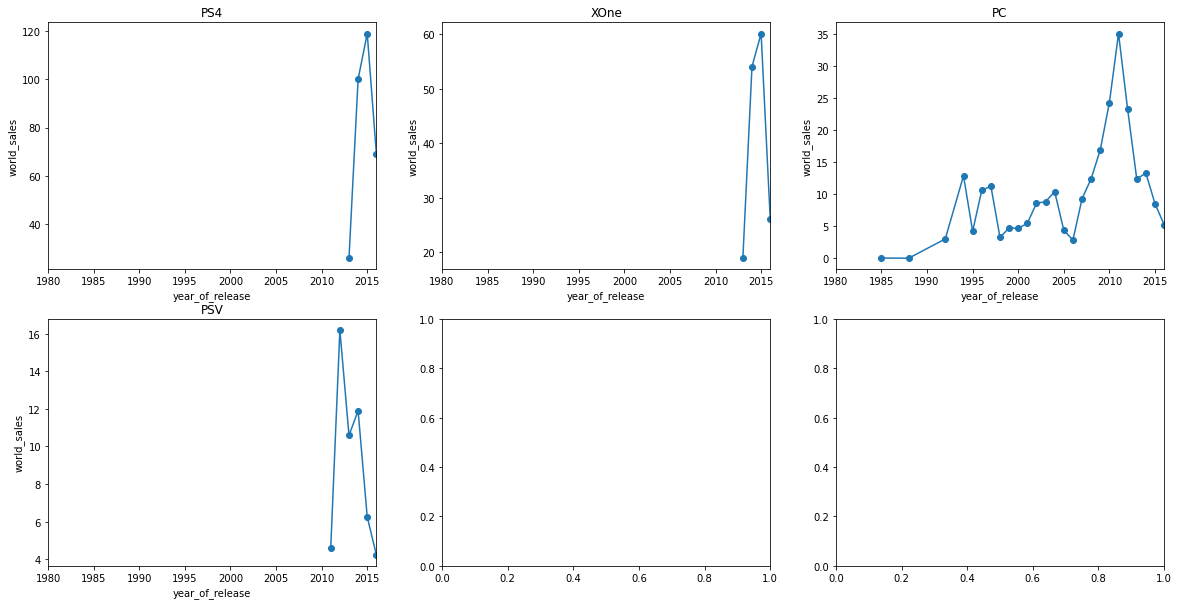

In [ ]:
platforms = ['PS4', 'XOne', 'PC', 'PSV']
visualize_by_platforms(platforms, data, 'year_of_release', 'world_sales')

эти компании тоже теряют в продажах, поэтому посмотрим на топ компаний по количеству продаж на 2016 год

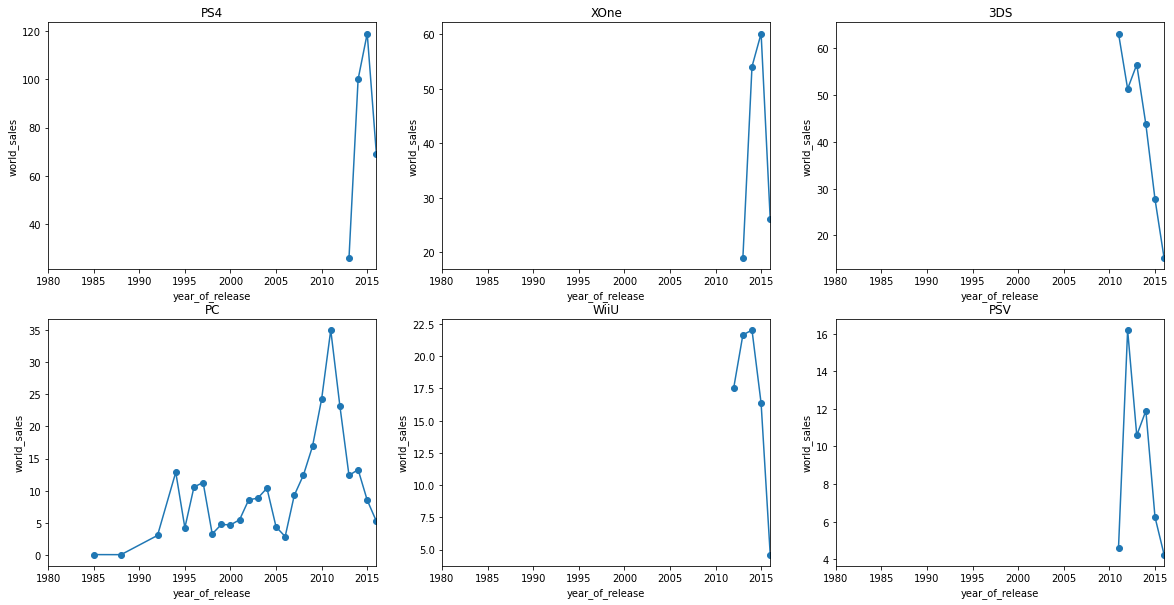

In [ ]:
data_2016_group_by_platform = data.loc[data['year_of_release']==2016].groupby(by=['platform']).sum().sort_values(by='world_sales', ascending=False)['world_sales']
count_of_the_top_2016_platforms = 6 # число топ платформ, которые мы будем учитывать
top_2016_platforms = data_2016_group_by_platform.index[0:count_of_the_top_2016_platforms]
visualize_by_platforms(top_2016_platforms, data, 'year_of_release', 'world_sales')

картина схожая, все компании теряют в продажах

хорошо, посмотрим просто на все компании, у которых есть хоть сколько-то продаж после 2014 года

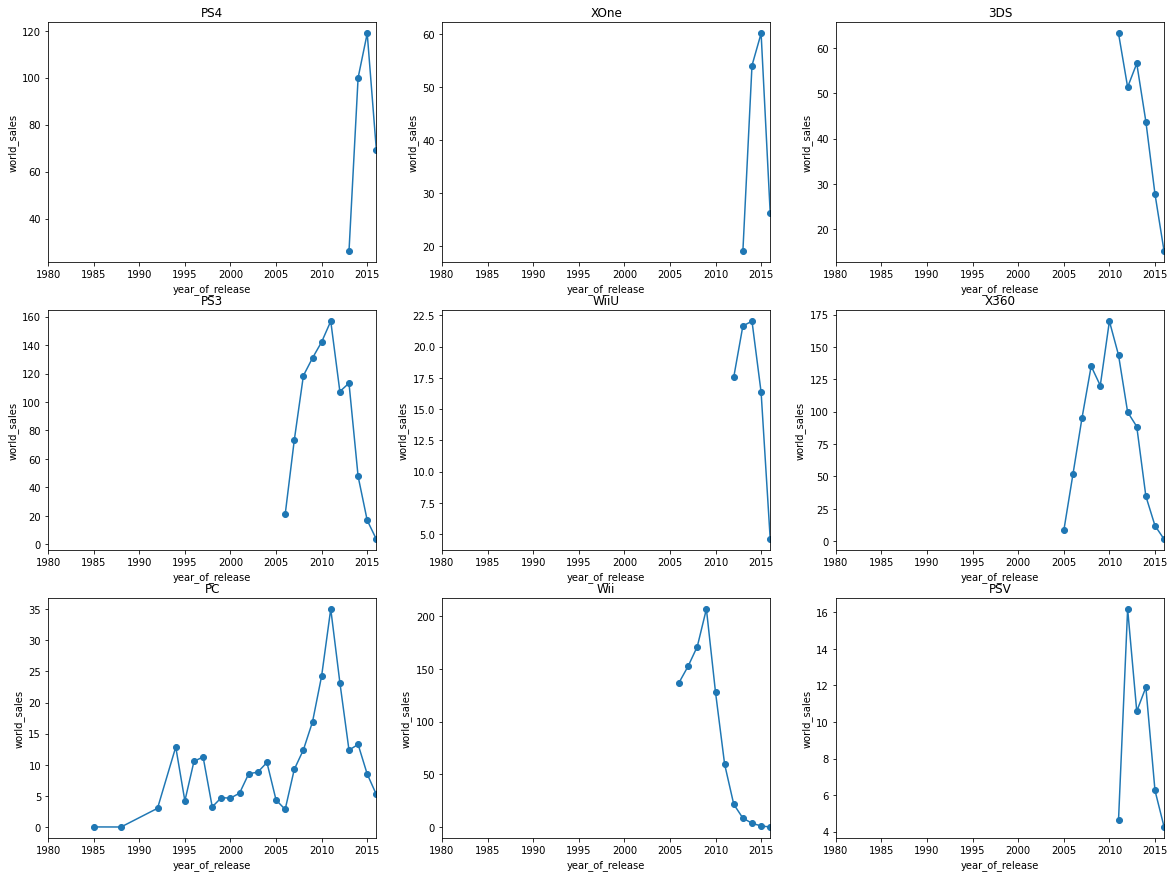

In [ ]:
data_after_2014_group_by_platform = data.loc[(data['year_of_release']>=2014) & \
                                             (data['world_sales']>1)].groupby(by=['platform']).sum().sort_values(by='world_sales', \
                                                                                                                 ascending=False)['world_sales']
all_platforms_after_2014 = data_after_2014_group_by_platform.index
visualize_by_platforms(all_platforms_after_2014, data, 'year_of_release', 'world_sales')

самый положительный прогноз на 2017 год у XOne и у PS4. PC также держится много лет и явно не устареет в 2017.

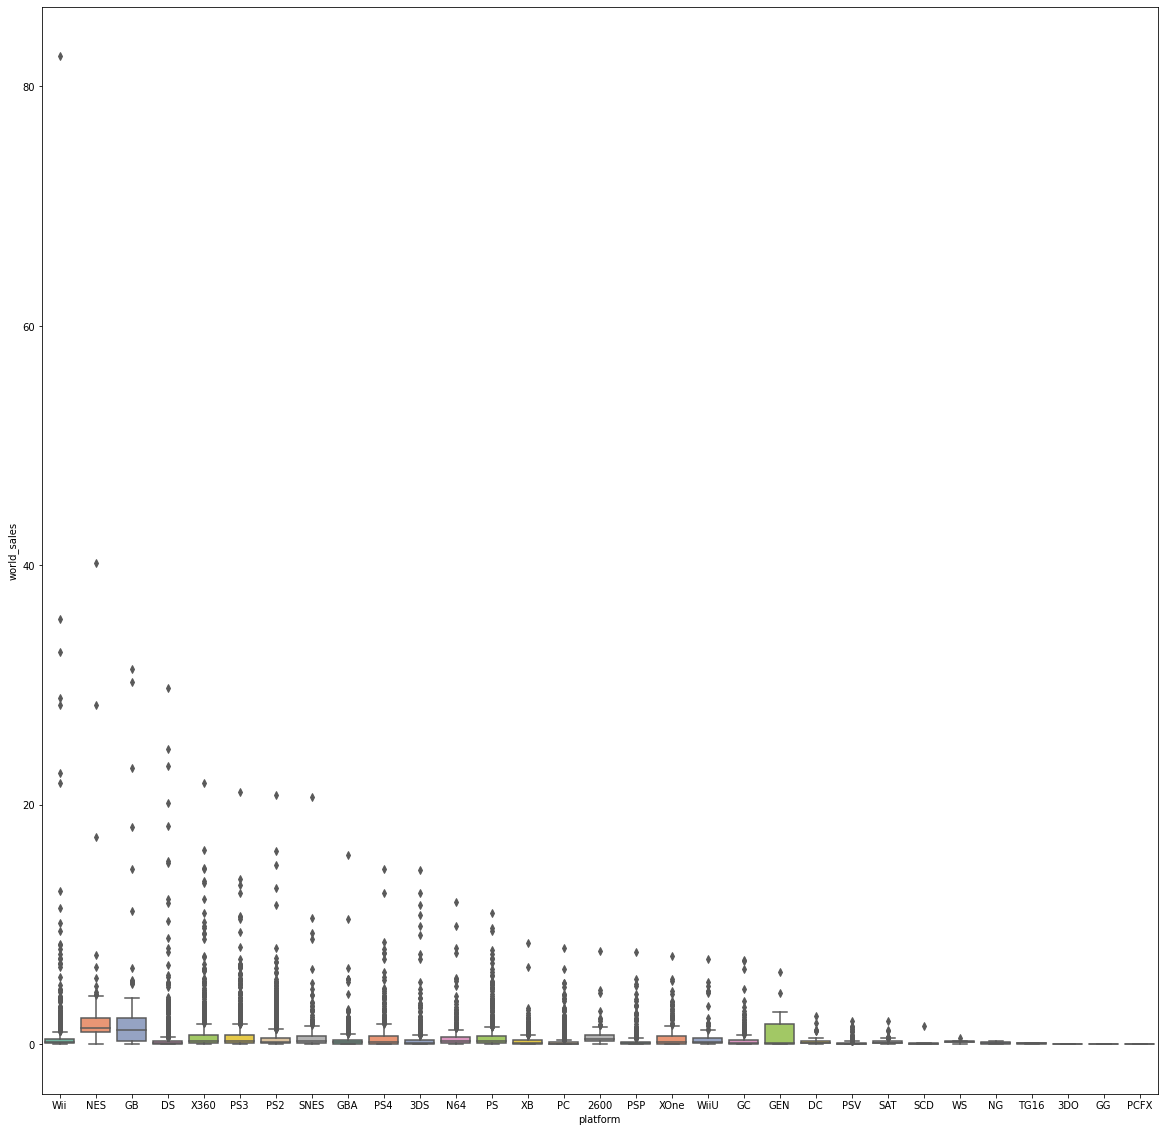

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x='platform', y='world_sales', data=data, ax=ax, palette="Set2")
plt.show()

у всех платформ маленькое тело бокса и большое количество выбросов. это означает, что некоторые игры у платформ "выстреливали", но большее количество было малоприбыльным

посмотрим как влияют отзывы на продажи на примере PS4

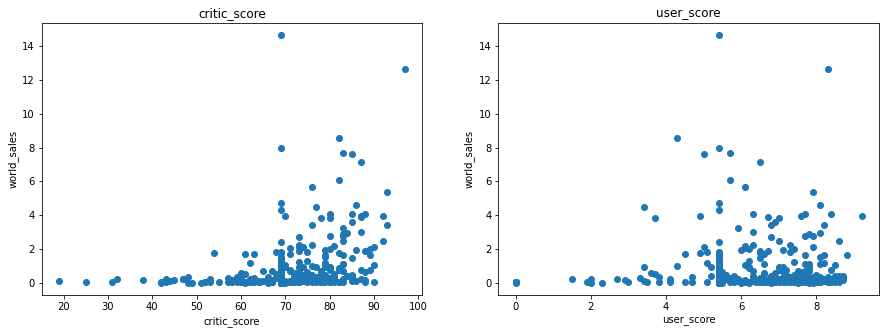

In [ ]:
data_ps4 = data.loc[data['platform']=='PS4']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(y=data_ps4['world_sales'], x=data_ps4['critic_score'])
ax[0].set_title('critic_score')
ax[0].set_xlabel('critic_score')
ax[0].set_ylabel('world_sales')
ax[1].scatter(y=data_ps4['world_sales'], x=data_ps4['user_score'])
ax[1].set_title('user_score')
ax[1].set_xlabel('user_score')
ax[1].set_ylabel('world_sales')
plt.show()

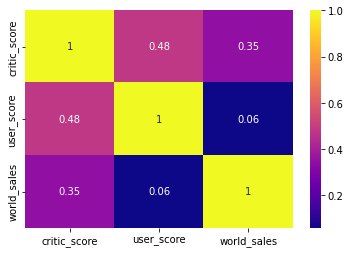

In [ ]:
data_scores = data_ps4[['critic_score', 'user_score', 'world_sales']]
sns.heatmap(data_scores.corr(), annot=True, cmap='plasma')

оценки критиков влияют на продажу сильнее, чем оценки пользователей, а также прослеживается зависимость между оценками критиков и пользователей

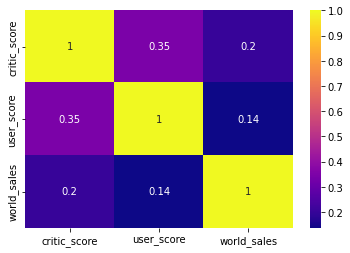

In [ ]:
data_scores = data[['critic_score', 'user_score', 'world_sales']]
sns.heatmap(data_scores.corr(), annot=True, cmap='plasma')

если смотреть на корреляцию на всех данных, то зависимость примерно такая же

посмотрим на распределение по жанрам

In [ ]:
data_group_by_genre = data.groupby(by='genre').sum()
data_group_by_genre['count_games'] = data.groupby(by='genre').count()['name']
data_group_by_genre[['count_games', 'world_sales']].sort_values(by='world_sales', ascending=False)

,count_games,world_sales
genre,,
Action,3307,1716.52
Sports,2306,1309.67
Shooter,1296,1041.36
Role-Playing,1481,931.08
Platform,878,825.55
Misc,1721,790.29
Racing,1226,723.49
Fighting,837,442.66
Simulation,857,387.96


топ 3 жанра по продажам это экшен, спорт и шутеры. самыми малоприбыльными оказались стратегии, пазлы и приключения. меньше всего игр в категориях пазлы и стратегии.

##Этап 3. Портрет пользователя.

In [ ]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
7614,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0.00,0.01,67.000000,0.000000,E10+,0.20
16108,Starry ? Sky: After Autumn,PSP,2011.0,Misc,0.00,0.00,0.01,0.00,68.994363,5.405407,E,0.01
4657,God Eater 2: Rage Burst,PSV,2015.0,Role-Playing,0.00,0.03,0.37,0.01,68.994363,8.100000,T,0.41
14283,Gotouchi Tetsudou: Gotouchi Chara to Nihon Zen...,WiiU,2014.0,Misc,0.00,0.00,0.03,0.00,68.994363,5.405407,E,0.03
16416,Neo Angelique Special,PSP,2008.0,Adventure,0.00,0.00,0.01,0.00,68.994363,5.405407,E,0.01


посмотрим на топ 5 платформ, продаж по ним и жанров для каждого региона

In [ ]:
 data_group_by_platform.sort_values(by='na_sales', ascending=False).iloc[0:5]

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
platform,,,,,,,,
X360,2476173.0,595.74,268.32,12.30,84.88,84725.094701,7416.003039,961.24
PS2,4263750.0,572.92,332.63,137.54,190.47,146394.197294,12929.928133,1233.56
Wii,2583531.0,486.87,258.32,68.28,77.71,85195.952649,5368.076187,891.18
PS3,2626158.0,390.13,327.21,79.41,134.59,91292.170237,7720.635725,931.34
DS,4259361.0,380.31,188.41,175.02,59.04,142609.034949,8271.277101,802.78


In [ ]:
print('top platforms in na: ', \
      data_group_by_platform.sort_values(by='na_sales', ascending=False).index[0:5].values,\
      '\ttheir sales: ',\
      data_group_by_platform.sort_values(by='na_sales', ascending=False).iloc[0:5]['na_sales'].values,\
      '\ttop genres: ',\
      data_group_by_genre.sort_values(by='na_sales', ascending=False).index[0:5].values)
print('top platforms in eu: ', \
      data_group_by_platform.sort_values(by='eu_sales', ascending=False).index[0:5].values,\
      '\ttheir sales: ',\
      data_group_by_platform.sort_values(by='eu_sales', ascending=False).iloc[0:5]['eu_sales'].values,\
      '\ttop genres: ',\
      data_group_by_genre.sort_values(by='eu_sales', ascending=False).index[0:5].values)
print('top platforms in jp: ', \
      data_group_by_platform.sort_values(by='jp_sales', ascending=False).index[0:5].values,\
      '\ttheir sales: ',\
      data_group_by_platform.sort_values(by='jp_sales', ascending=False).iloc[0:5]['jp_sales'].values,\
      '\ttop genres: ',\
      data_group_by_genre.sort_values(by='jp_sales', ascending=False).index[0:5].values)
print('top platforms in other countries: ', \
      data_group_by_platform.sort_values(by='other_sales', ascending=False).index[0:5].values,\
      '\ttheir sales: ',\
      data_group_by_platform.sort_values(by='other_sales', ascending=False).iloc[0:5]['other_sales'].values,\
      '\ttop genres: ',\
      data_group_by_genre.sort_values(by='other_sales', ascending=False).index[0:5].values)
print('top platforms in the world: ', \
      data_group_by_platform.sort_values(by='world_sales', ascending=False).index[0:5].values,\
      '\ttheir sales: ',\
      data_group_by_platform.sort_values(by='world_sales', ascending=False).iloc[0:5]['world_sales'].values,\
      '\ttop genres: ',\
      data_group_by_genre.sort_values(by='world_sales', ascending=False).index[0:5].values)

top platforms in na:  ['X360' 'PS2' 'Wii' 'PS3' 'DS'] 	their sales:  [595.74 572.92 486.87 390.13 380.31] 	top genres:  ['Action' 'Sports' 'Shooter' 'Platform' 'Misc']
top platforms in eu:  ['PS2' 'PS3' 'X360' 'Wii' 'PS'] 	their sales:  [332.63 327.21 268.32 258.32 212.39] 	top genres:  ['Action' 'Sports' 'Shooter' 'Racing' 'Misc']
top platforms in jp:  ['DS' 'PS' 'PS2' 'SNES' '3DS'] 	their sales:  [175.02 139.78 137.54 116.55 100.62] 	top genres:  ['Role-Playing' 'Action' 'Sports' 'Platform' 'Misc']
top platforms in other countries:  ['PS2' 'PS3' 'X360' 'Wii' 'DS'] 	their sales:  [190.47 134.59  84.88  77.71  59.04] 	top genres:  ['Action' 'Sports' 'Shooter' 'Racing' 'Misc']
top platforms in the world:  ['PS2' 'X360' 'PS3' 'Wii' 'DS'] 	their sales:  [1233.56  961.24  931.34  891.18  802.78] 	top genres:  ['Action' 'Sports' 'Shooter' 'Role-Playing' 'Platform']


посмотрим влияет ли рейтинг на продажи в каждом регионе. для этого посчитаем сумму продаж и среднее значение для каждого рейтинга

In [ ]:
data_group_by_rating = data.groupby(by='rating').sum()[['na_sales','eu_sales','jp_sales','other_sales']]
data_group_by_rating['na_mean'] = data.groupby(by='rating')['na_sales'].mean()
data_group_by_rating['eu_mean'] = data.groupby(by='rating')['eu_sales'].mean()
data_group_by_rating['jp_mean'] = data.groupby(by='rating')['jp_sales'].mean()
data_group_by_rating['other_mean'] = data.groupby(by='rating')['other_sales'].mean()
data_group_by_rating

,na_sales,eu_sales,jp_sales,other_sales,na_mean,eu_mean,jp_mean,other_mean
rating,,,,,,,,
AO,1.26,0.61,0.00,0.09,1.260000,0.610000,0.000000,0.090000
E,2500.08,1313.52,1034.70,381.41,0.235923,0.123952,0.097641,0.035992
E10+,345.50,183.35,40.20,71.93,0.248026,0.131622,0.028859,0.051637
EC,1.53,0.11,0.00,0.11,0.191250,0.013750,0.000000,0.013750
K-A,2.56,0.27,1.46,0.03,0.853333,0.090000,0.486667,0.010000
M,742.89,480.00,63.58,176.06,0.483652,0.312500,0.041393,0.114622
RP,0.00,0.03,0.00,0.01,0.000000,0.030000,0.000000,0.010000
T,747.60,421.79,150.70,152.99,0.257349,0.145194,0.051876,0.052664


продажи определенно зависят от рейтинга: как общее колоичество, так и среднее число продаж

##Этап 4. Проверка гипотез.

In [ ]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
6689,Namco Tennis Smash Court,PS,1995.0,Sports,0.00,0.00,0.23,0.02,68.994363,5.405407,E,0.25
10848,Dead or Alive 5,PSV,2013.0,Fighting,0.00,0.05,0.03,0.01,68.994363,5.405407,E,0.09
2493,Tales of Destiny II,PS,2000.0,Role-Playing,0.06,0.04,0.66,0.05,78.000000,8.700000,T,0.81
12450,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.000000,5.405407,E,0.06
8746,The King of Fighters XIV,PS4,2016.0,Fighting,0.07,0.02,0.04,0.02,79.000000,8.700000,T,0.15


In [ ]:
data.groupby(by='platform').mean()['user_score'].loc[['XOne', 'PC']]

platform
XOne    5.987012
PC      6.438691
Name: user_score, dtype: float64

гипотеза неверна, они разные

In [ ]:
data.groupby(by='genre').mean()['user_score'].loc[['Action', 'Sports']]

genre
Action    5.701476
Sports    5.178460
Name: user_score, dtype: float64

гипотеза верна, они действительно разные

##Этап 5. Общий вывод.

Исходя из тех данных, что имеем, можно сказать, что:


1.   на 2017 год нет платформ, на которых ярковыраженный рост продаж
2.   в разных странах схожие самые популярные жанры игр и платформы
3.   продажи зависят от отзывов

Сами данные были довольно грязными и с большим количеством пропусков.